In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('C:/Users/USER/Desktop/iris (2).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.shape

(150, 5)

#### Missing values

In [3]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### check the distribution of data

In [6]:
freqgraph = data.select_dtypes(include=['float'])

In [7]:
freqgraph

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


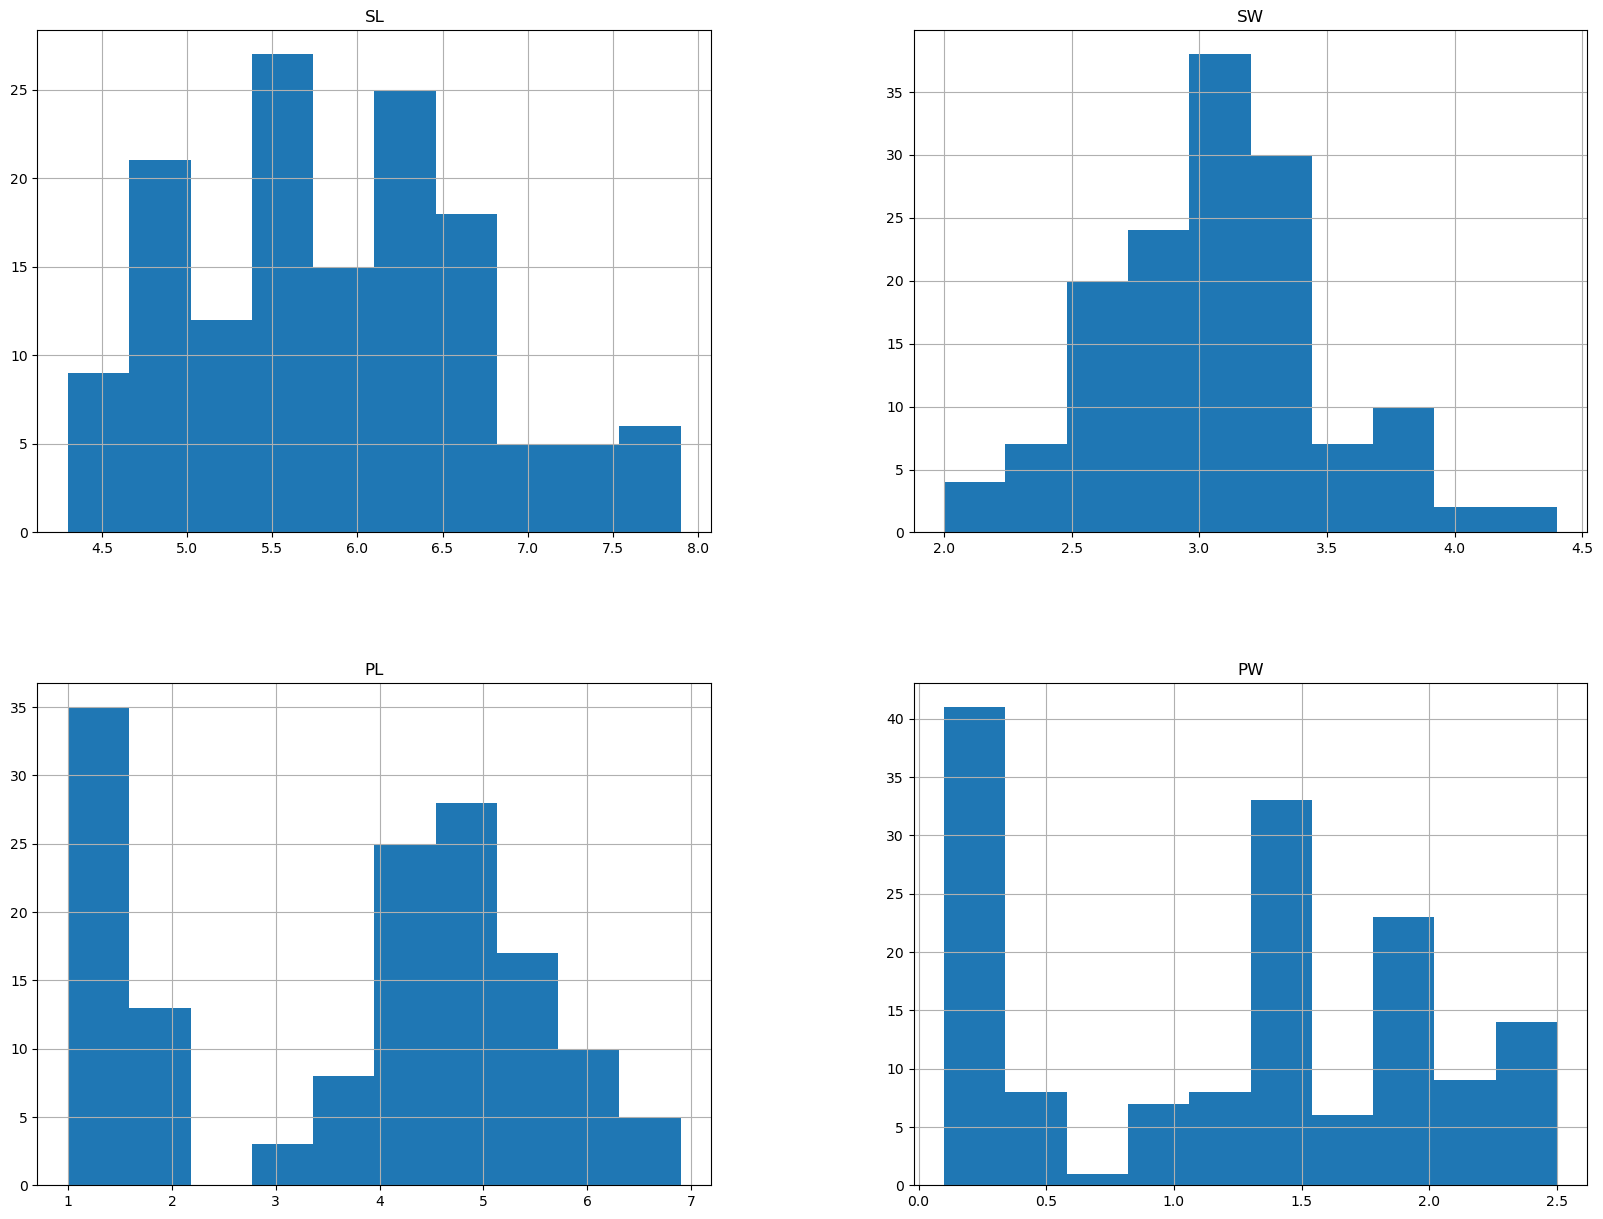

In [8]:
freqgraph.hist(figsize=(20,15))
plt.show()

##### It is skewed so we have to fill the missing values with median

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
for i in ['SL', 'SW', 'PL', 'PW']:
    data[i] = data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

##### Encoding categorical column

In [12]:
data['Classification'].nunique()

3

In [13]:
#Label encoding classification column

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [14]:
data['Classification'] = label_enc.fit_transform(data['Classification'])

In [15]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


##### Splitting data in to train and test

In [17]:
y= data['Classification']
x= data.drop('Classification',axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

##### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg = LogisticRegression()

In [22]:
model1 =log_reg.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = model1.predict(x_test)

In [24]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [25]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [26]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [27]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158


##### KNN model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(x_train,y_train)
    y_pred_knn = model2.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [29]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

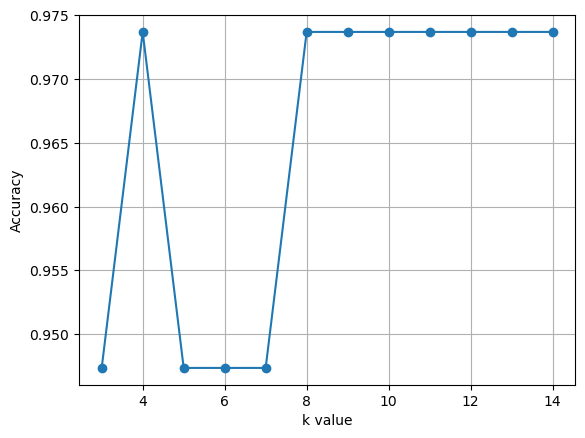

In [30]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [31]:
#Here getting heighest accuracy for k value =4,8,10,12,14 and lowest accuracy for k value =6

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
model2 = knn.fit(x_train,y_train)
y_pred_knn = model2.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
print(confusion_matrix(y_test,y_pred_knn))

[[14  1  0]
 [ 0 10  1]
 [ 0  0 12]]


In [34]:
print(accuracy_score(y_test,y_pred_knn))

0.9473684210526315


##### SVM model

In [35]:
from sklearn.svm import SVC

In [36]:
svm_clf = SVC(kernel ='rbf')

In [37]:
svm_model = svm_clf.fit(x_train,y_train)

In [38]:
y_pred1 =svm_clf.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred1)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred1)

0.9736842105263158

##### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_clf = DecisionTreeClassifier()

In [43]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred2 = dt_clf.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred2)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred2)

1.0

##### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier()

In [49]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred3 = rf_clf.predict(x_test)

In [51]:
confusion_matrix(y_test,y_pred3)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred3)

1.0

##### Decision Tree and Random Forest models gives the highest accuracy value ie; 1.0 and least accuracy value is given by KNN model  0.94. The accuracy of Logistic Regression and SVM models are 0.97. Decision Tree and Random Forest model gives the best accuracy value.